# Потоки


**Поток** — это последовательность, состоящая из постоянных событий, отсортированных по времени. В нем может быть три типа сообщений: значения (данные некоторого типа), ошибки и сигнал о завершении работы.

Рассмотрим то, что сигнал о завершении имеет место для экземпляра объекта во время нажатия кнопки закрытия.

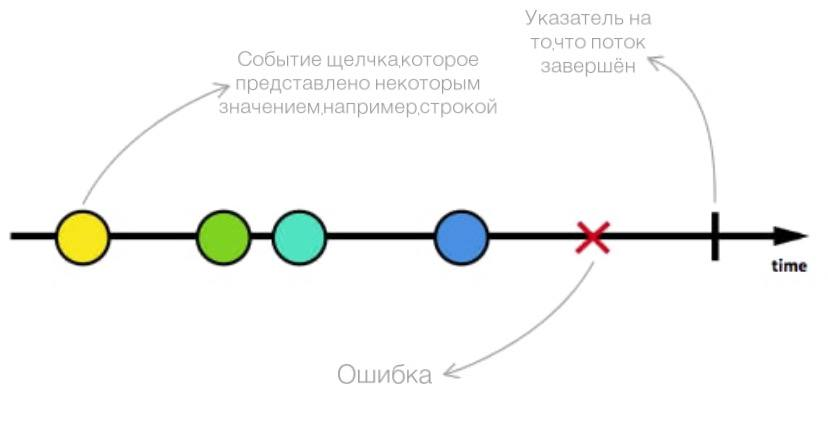

Мы получаем эти cгенерированные события асинхронно, всегда. Согласно идеологии реактивного программирования существуют три вида функций: те, которые должны выполняться, когда некоторые конкретные данные будут отправлены, функции обработки ошибок и другие функции с сигналами о завершении работы программы.

Слушать(**listening**) поток означает подписаться(**subscribing**) на него. То есть функции, которые мы определили это наблюдатели(**observers**). А поток является субъектом который наблюдают.

# Реактивное программирование





> Почему именно реактивное программирование?

Веб-приложения содержат множество операций с базами данных, сетевыми вызовами, вложенными обратными вызовами и другими вычислительно дорогостоящими задачами, выполнение которых может занять много времени (или даже блокировать другие потоки, пока это не будет сделано). Именно здесь вступает в действие реактивное программирование, оно дает нам возможность преобразовывать практически все в потоки (например, переменные, свойства, вводимые пользователем данные, кэши и т.д.), чтобы управлять этим асинхронно. Кроме того, это также дает нам простой способ обработки ошибок. Реактивное программирование делает наш код более гибким, читаемым, ремонтопригодным и простым в написании.

> Так что же такое реактивное программирование?

**Реактивное программирование** - это парадигма программирования, которая имеет дело с потоками данных и распространением изменений. Это означает, что когда поток данных передается одному компоненту, изменение будет распространяться и на другие компоненты с помощью библиотеки реактивного программирования.
Распространение изменений будет продолжаться до тех пор, пока они не достигнут конечного получателя. Разница между управляемым событиями и реактивным программированием заключается в том, что управляемое событиями программирование вращается вокруг событий, а реактивное программирование вращается вокруг данных.

С реактивным программированием Вы получаете прекрасный набор инструментов и функций для сочетания, которые позволяют создавать и фильтровать каждый из потоков. Потоки могут быть использованы как входные параметры друг друга. Даже множественный поток может быть использован как входной аргумент другого потока. Вы можете объединять несколько потоков. Вы можете фильтровать один поток, чтобы потом получить другой, который содержит только актуальные данные. Вы можете объединять данные с одного потока с данными другого, чтобы получить еще один.

**ReactiveX** или **Raective Extension** - самая известная реализация реактивного программирования. 

# ReactiveX

ReactiveX для Python - это библиотека для создания асинхронных и основанных на событиях программ с использованием наблюдаемых последовательностей и конвейерных операторов запросов в Python. Используя Rx, разработчики представляют асинхронные потоки данных с помощью наблюдаемых, запрашивают асинхронные потоки данных с помощью операторов и параметрируют параллелизм в потоках данных/событий с помощью планировщиков.

In [ ]:
import reactivex as rx
from reactivex import operators as ops

source = rx.of("Alpha", "Beta", "Gamma", "Delta", "Epsilon")

composed = source.pipe(
 ops.map(lambda s: len(s)),
ops.filter(lambda i: i >= 5)
)
composed.subscribe(lambda value: print("Received {0}".format(value)))

Файл "ReactiveX.py".

Вывод программы:

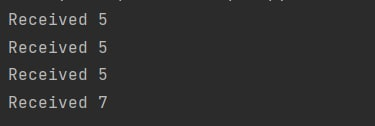


ReactiveX в основном основан на двух классах: классах **Observable** и **Observer**.





> Что такое Observer, Observable, Subject?



Стоит немного рассказать о том, что такое Observer, Observable, Subject.

Модель **Observable** является источником данных и позволяет обрабатывать потоки асинхронных событий похожим образом с тем, который вы используете для коллекций данных, таких как массивы. И всё это вместо колбэков, а значит, код является более читабельным и менее склонным к ошибкам.











> Наблюдатели и наблюдаемые в реактивном программировании.



В ReactiveX наблюдатель (**Observer**) подписывается на Observable и впоследствии реагирует на элемент или последовательность элементов, которые тот отправляет. У каждого Observer, подписанного на Observable, вызывается метод **Observer.on_next()** на каждый элемент потока данных, после которого может быть вызван как **Observer.on_complete()**, так и **Observer.on_error()**.



*   **Observer.on_next()** − подразумевает наличие элемента в потоке данных.
*   **Observer.on_complete()** − это означает конец эмиссии и больше никаких элементов не поступает.
*   **Observer.on_error()** - оно также подразумевает окончание эмиссии, но в случае, когда **observable** выдает ошибку.



Часто Observable применяется таким образом, что он не начинает отдавать данные до тех пор, пока кто-нибудь не подписывается на него. Это так называемые “ленивые вычисления” – значения вычисляются только тогда, когда в них возникает потребность.

Наблюдаемый объект может быть сконфигурирован таким образом, чтобы он регулировал то, когда ему предоставлять данные. Например, он может запускаться периодически или только один раз в их жизненном цикле. Существуют также различные функции, которые можно использовать для фильтрации или преобразования наблюдаемого, чтобы наблюдатель выдавал только определенные данные. Все это используется вместо обратных вызовов, что означает, что наш код становится более читаемым и менее подверженным ошибкам.

Давайте рассмотрим следующий пример:

In [ ]:
from reactivex import create

def push_five_strings(observer, scheduler):
    observer.on_next("Alpha")
    observer.on_next("Beta")
    observer.on_next("Gamma")
    observer.on_next("Delta")
    observer.on_next("Epsilon")
    observer.on_completed()

source = create(push_five_strings)

source.subscribe(
    on_next = lambda i: print("Received {0}".format(i)),
    on_error = lambda e: print("Error Occurred: {0}".format(e)),
    on_completed = lambda: print("Done!"),
)

Файл "observer1.py"

Наблюдаемый объект создается с помощью команды *create*. При подписке вызывается функция *push_five_strings*. Эта функция выдает пять элементов. Три обратных вызова, предоставляемые функции подписки, просто печатают полученные элементы и состояния завершения.

Вывод программы:

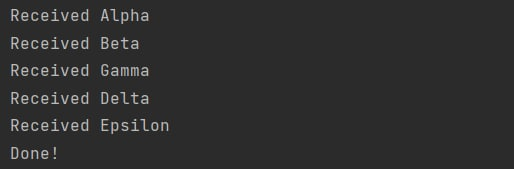

Нам не нужно указывать все три типа событий в коде. Мы можем выбрать, какие именно события наблюдать, используя именованные аргументы или просто предоставляя лямбда-выражение для функции on_next. Как правило, в рабочей среде мы хотим предоставить обработчик on_error, чтобы ошибки явно обрабатывались подписчиком.

Чтобы просто нажать пять элементов, мы можем избавиться от *create()* и его функции резервного копирования, а также использовать *of()*. Эта фабрика принимает список аргументов, выполняет итерацию по каждому аргументу, чтобы выдать их как элементы, и завершает работу. Поэтому мы можем просто передать ему эти пять строк в качестве аргументов:

In [ ]:
from reactivex import of

source = of("Alpha", "Beta", "Gamma", "Delta", "Epsilon")

source.subscribe(
    on_next = lambda i: print("Received {0}".format(i)),
    on_error = lambda e: print("Error Occurred: {0}".format(e)),
    on_completed = lambda: print("Done!"),
)

Файл "observer2.py"

Вывод программы не изменится:

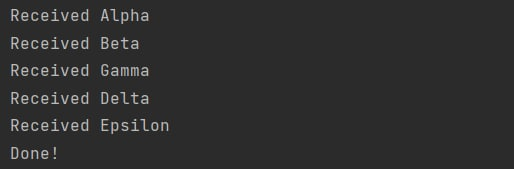



> Удаление списка Наблюдаемых объектов



Поддержка списка наблюдаемых в качестве параметра удаляется при  помощи следующих операторов: *merge*, *zip* и *combine_latest*. 

Наблюдаемые объекты должны быть предоставлены явно:

In [ ]:
import rx, operator as op

obs1 = rx.from_([1, 2, 3, 4])
obs2 = rx.from_([5, 6, 7, 8])

res = rx.merge(obs1, obs2)
res.subscribe(print)

Файл "observable1.py".

Вывод программы:

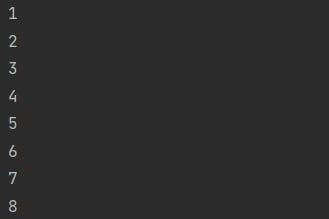

Если по какой-либо причине Наблюдаемые объекты доступны только в виде списка, то их можно распаковать:

In [ ]:
import rx
from rx import operators as ops

obs1 = rx.from_([1, 2, 3, 4])
obs2 = rx.from_([5, 6, 7, 8])

obs_list = [obs1, obs2]

res = rx.merge(*obs_list)
res.subscribe(print)

Файл "observable2.py".

Вывод программы:

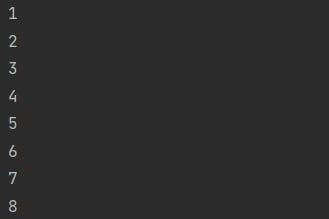



>  Объекты в реактивном программировании.


Бывают задачи, для решения которых нужно соединить Observer и Observable, чтобы принимать сообщения о событиях и сообщать о них своим подписчикам. Для этого существует Subject, имеющий, кроме стандартной, ещё несколько реализаций:

*   **ReplaySubject** имеет возможность кэшировать все поступившие в него данные, а при появлении нового подписчика – отдавать всю эту последовательность сначала, работая далее в обычном режиме.
*   **BehaviorSubject** хранит последнее значение, по аналогии с ReplaySubject отдавая его появившемуся подписчику. При создании он получает значение по умолчанию, которое будет получать каждый новый подписчик, если последнего значения еще не было.
*   **AsyncSubject** также хранит последнее значение, но не отдает данные, пока не завершится вся последовательность.

**Subscriber** может не только подписаться на **Observable**, но и отказаться от подписки на него. Важно помнить, что нужно отказаться от подписки на асинхронные вызовы. При вызове **unsubscribe()** все операторы отписываются друг от друга последовательно сверху вниз. Таким образом, мы можем избежать утечек памяти. В случае субъектов можно использовать метод **dispose**, который можно рассматривать как саму подписку или, возможно, токен, представляющий подписку. Удаление его приведет к удалению подписки, а также к отказу от подписки. Вызов отмены подписки может быть помещен в метод socket **on_close()**.



> Передача данных Объекту.


Вы можете передать данные субъекту, созданному с помощью метода *on_next(value)*, как показано ниже −


```
# subject_test.on_next("A")
  subject_test.on_next("B")
```

Данные будут переданы всем подписчикам, добавленным по теме.

Пример:

In [ ]:
from rx.subject import Subject
subject_test = Subject()
subject_test.subscribe(
   lambda x: print("The value is {0}".format(x))
)
subject_test.subscribe(
   lambda x: print("The value is {0}".format(x))
)
subject_test.on_next("A")
subject_test.on_next("B")

Файл sibject2.py".

Объект *subject_test* создается путем вызова функции *Subject()*. Объект *subject_test* имеет ссылку на методы *on_next*(значение), *on_error*(ошибка) и *on_completed*(). 

Вывод кода:

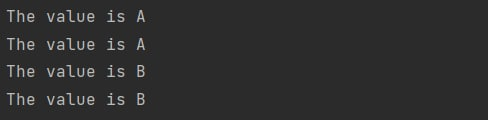

Мы можем использовать метод on_completed(), чтобы остановить выполнение объекта, как показано ниже.

In [ ]:
from rx.subject import Subject
subject_test = Subject()
subject_test.subscribe(
   lambda x: print("The value is {0}".format(x))
)
subject_test.subscribe(
   lambda x: print("The value is {0}".format(x))
)
subject_test.on_next("A")
subject_test.on_completed()

Файл "subject3.py".

Как только мы вызываем *`complete`*, следующий метод, вызванный позже, не вызывается.
Вывод программы:

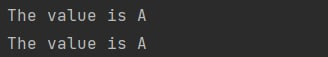

Давайте теперь посмотрим, как вызвать метод *on_error*(ошибка).

In [ ]:
from rx.subject import Subject
subject_test = Subject()
subject_test.subscribe(
   on_error = lambda e: print("Error : {0}".format(e))
)
subject_test.subscribe(
   on_error = lambda e: print("Error : {0}".format(e))
)
subject_test.on_error(Exception('There is an Error!'))

Файл "subject4.py".

Вывод:

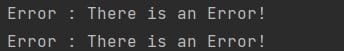

Пример объекта в реактивном программировании:

In [ ]:
import rx
import rx.operators as ops
from rx.subject import Subject


def component_a(input):
    return input.pipe(
        ops.map(lambda i: i*2)
    )


def component_b(input):
    input.subscribe(
        on_next=lambda i: print("item: {}".format(i)),
        on_error=lambda e: print("error: {}".format(e)),
        on_completed=lambda: print("Done")
    )
    return rx.from_([1, 2, 3])


b_in_proxy = Subject()
b_out = component_b(b_in_proxy)
a_out = component_a(b_out)
a_out.subscribe(b_in_proxy)

Файл "sublect.py".

Вывод:

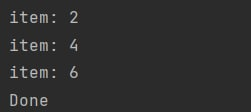



> Операторы и цепочка.



Как мы видели ранее, у нас есть наблюдаемый класс, который предоставляет поток данных, и наблюдатель, который его потребляет. Но на пути от наблюдаемого к подписчику мы можем применить к потоку множество операторов. Эти операторы определяют, как и когда наблюдаемые объекты должны испускать потоки.

Большинство операторов выполняют функцию для наблюдаемого объекта и возвращают наблюдаемый объект. Таким образом, мы можем применять эти операторы один за другим, в цепочке. Каждый оператор в цепочке изменяет наблюдаемое, которое является результатом работы предыдущего оператора.

Вы можете создавать новые наблюдаемые объекты, используя более 130 операторов, доступных в RxPY. Каждый оператор будет выдавать новую наблюдаемую величину, которая каким-то образом преобразует выбросы от источника. Например, мы можем вынести  каждую строку с ее длиной, а затем отфильтровать для длины не менее 5. Это приведет к получению двух отдельных наблюдаемых объектов, построенных друг на друге.

In [ ]:
from reactivex import of, operators as op

source = of("Alpha", "Beta", "Gamma", "Delta", "Epsilon")

composed = source.pipe(
    op.map(lambda s: len(s)),
    op.filter(lambda i: i >= 5)
)
composed.subscribe(lambda value: print("Received {0}".format(value)))

Файл "operators1.py"

Вывод программы:

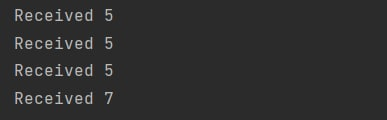

Как правило,не всегда хочется сохранять наблюдаемые данные в промежуточные переменные для каждого оператора, если только вы не хотите иметь несколько подписчиков на этом этапе. Вместо этого вы хотите стремиться встроить и создать “Наблюдаемый конвейер” операций. Таким образом, ваш код читается и рассказывает историю гораздо легче.

In [ ]:
from reactivex import of, operators as op

of("Alpha", "Beta", "Gamma", "Delta", "Epsilon").pipe(
    op.map(lambda s: len(s)),
    op.filter(lambda i: i >= 5)
).subscribe(lambda value: print("Received {0}".format(value)))

Файл "operators2.py".

Вывод программы:

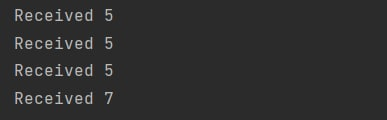

Операторы могут быть классифицированы по категориям их полезности следующим образом:


*   Создание наблюдаемых объектов
*   Преобразование наблюдаемых объектов
*   Фильтрация наблюдаемых объектов
*   Объединение наблюдаемых
*   Операторы обработки ошибок
*   Наблюдаемые коммунальные операторы
*   Условные и логические операторы
*   Математические и агрегатные операторы
*   Подключаемые Наблюдаемые Операторы




> Создание категории наблюдаемых объектов.



Один из операторов этой категории - **just()**, как следует из названия, выдает наблюдаемые объекты с теми же значениями, что и в аргументах.

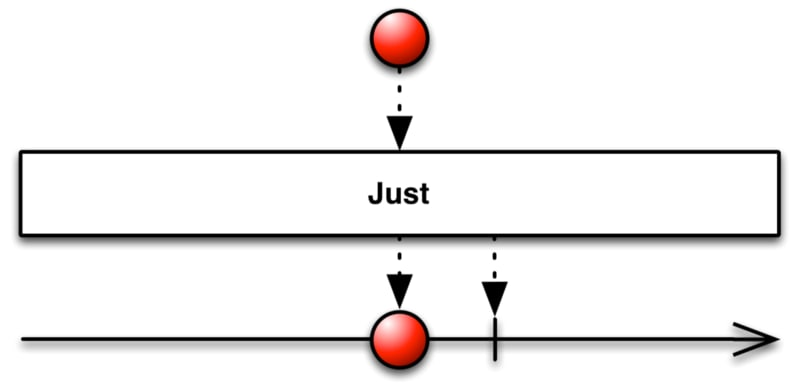

Как мы можем видеть в следующем примере, наша наблюдаемая просто испускает a, b, c, d один за другим:



```
# Observable.just(a,b,c,d)
```



Оператор **interval()** создает наблюдаемый, который выдает последовательность целых чисел, разделенных заданным интервалом времени.

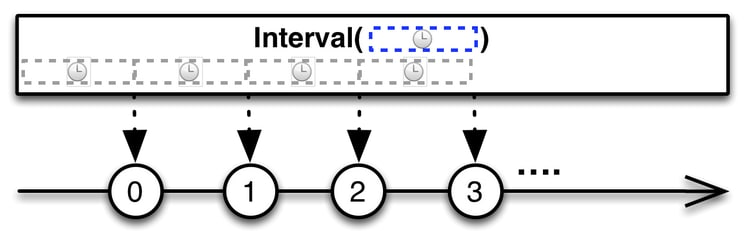

Например, следующая наблюдаемая функция обновляет значение каждые 60 секунд для периодических обновлений:



```
# Observable.interval(60000)
```





> Фильтрация наблюдаемых категорий.

Один из операторов этой категории - **filter()** выдает только те элементы из наблюдаемой, которые проходят проверку на предикат.

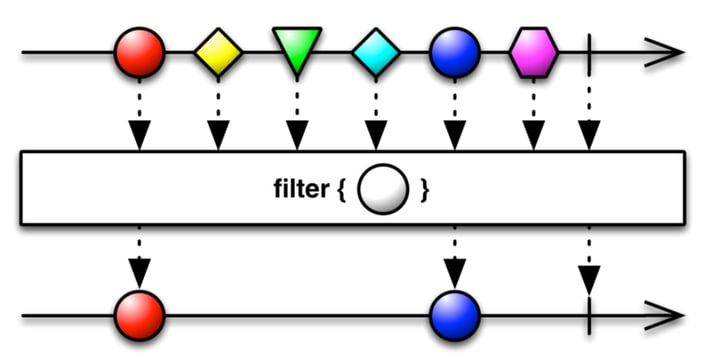

В следующем примере мы фильтруем по размеру текста, поэтому он выдает только строки, длина которых превышает 2 символа:



```
# Subject.filter( lambda text: not text or len(text) > 2 )
```



Оператор **throttle_last()** выдает самые последние элементы, отправленные наблюдаемым объектом в течение периодических интервалов времени.

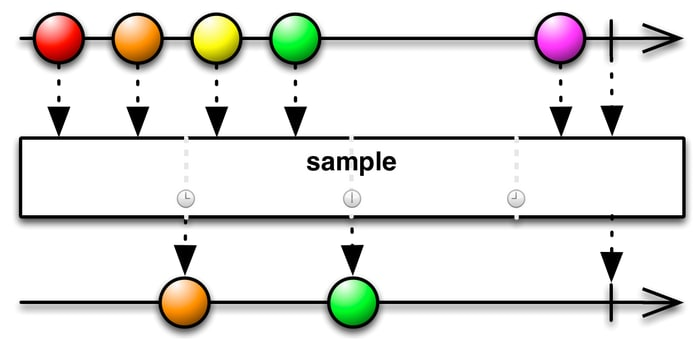

Например, чтобы получить последнее значение за заданный интервал времени, мы могли бы использовать RxPy следующим образом:



```
# Subject.throttle_last( 1000 )
```





> Преобразование наблюдаемых объектов.

Оператор **flat_map()** преобразует элементы, испускаемые наблюдаемым объектом, в наблюдаемые объекты, затем сглаживает выбросы от них в один наблюдаемый объект.


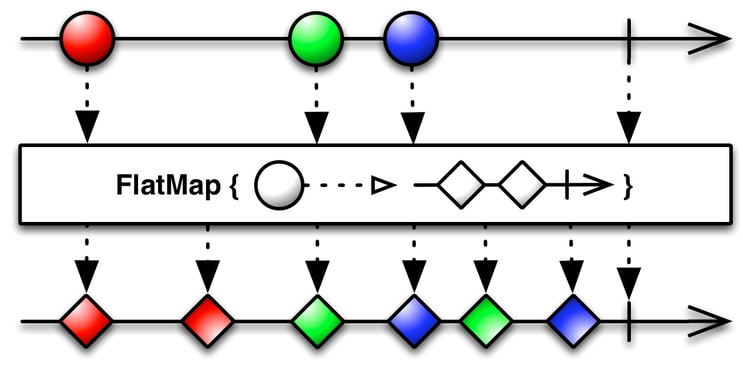

Здесь мы получаем информацию о репозиториях с помощью пользовательского ввода, который представляет собой название репозитория организации. Как вы можете видеть, мы вызываем наблюдаемый объект **from_future()**, поскольку мы используем асинхронный веб-сокет** tornado** для запроса информации **API**.



```
# Subject.flat_map( lambda name: Observable.from_future(self.get_org_repos(name)))
```





> Наблюдаемые коммунальные операторы.

Оператор **do_action()** регистрирует действие для выполнения различных наблюдаемых событий жизненного цикла.

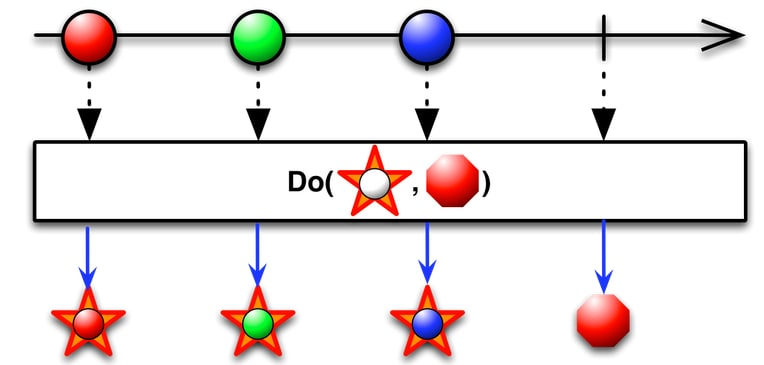

Здесь мы вызываем функцию **send_response **для каждого элемента в потоке данных.



```
# Subject.do_action( lambda x: send_response('clear') )
```





> Объединение наблюдаемых.

Оператор **combine_latest()** объединяет, когда элемент испускается любым из двух наблюдаемых объектов, последний элемент, испускаемый каждым наблюдаемым объектом с помощью указанной функции, и выдает элементы на основе результатов этой функции.

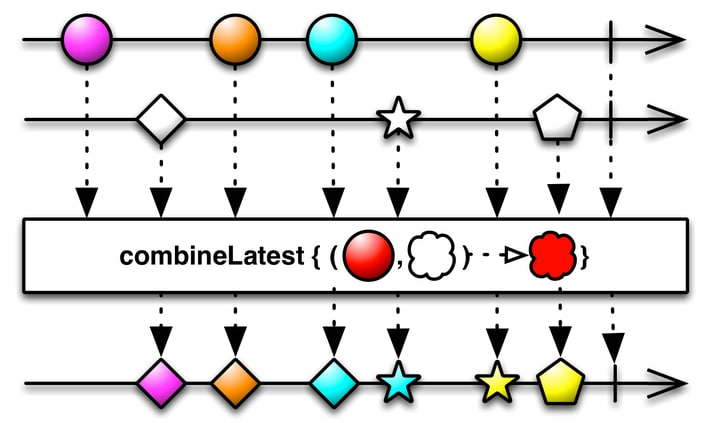

Здесь мы объединяем наблюдаемый интервал, который будет отправлять последний ввод пользователя каждые 60 секунд, и сам наблюдаемый **input_value**, который будет выдаваться при каждом его изменении:



```
# user_input.combine_latest( interval_observable, lambda input_value, i: input_value )
```





> Диаграммы



Observable и Observer – только начало ReactiveX. Они не несут в себе всю мощь, которую являют собой операторы, позволяющие трансформировать, объединять, манипулировать последовательностями элементов, которые отдают Observable.

К примеру, вот как эти диаграммы представляют Observable и их трансформации:

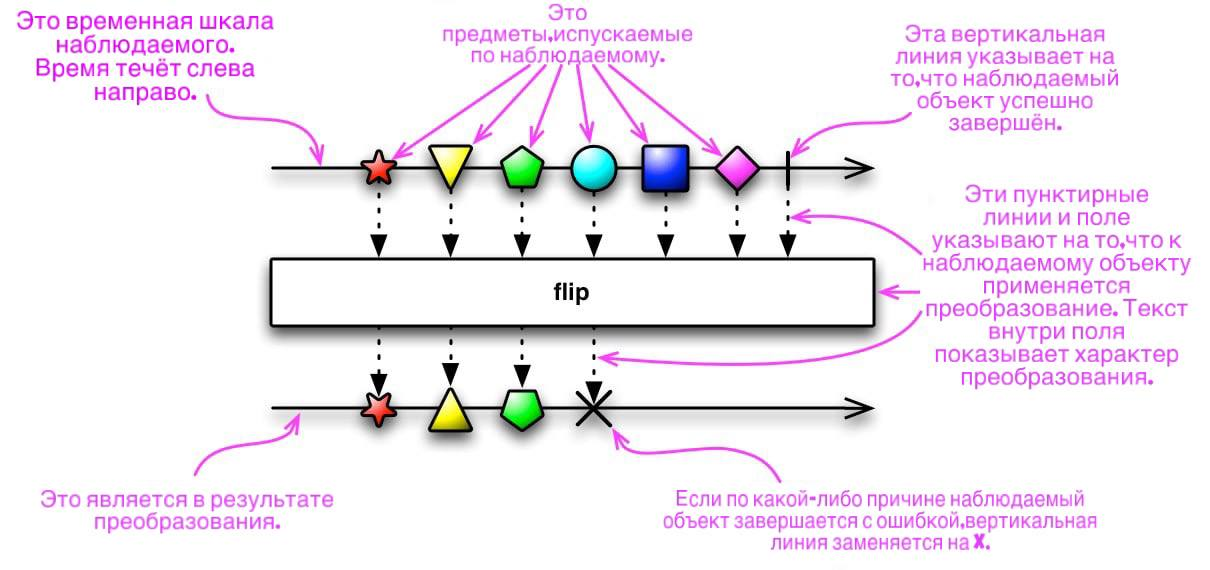


> Мраморные диаграммы



Вот мраморная диаграмма: пример, показывающий поведение оператора.Рассмотрим карту операторов. Этот оператор берет элементы из наблюдаемого источника, применяет функцию преобразования и возвращает наблюдаемое с функцией преобразования, примененной к источнику *items*.
*Мраморная диаграмма карты оператора* - это более простой способ объяснить это, а также визуальный способ понять, как работает ReactiveX:


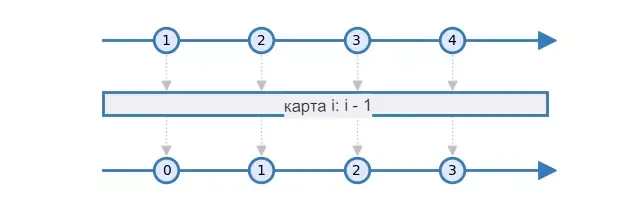

На диаграмме есть три части:

Верхняя стрелка указывает на наблюдаемый источник: при регистрации этот наблюдаемый источник излучает числа от 1 до 4.
Прямоугольник представляет вычисление, выполняемое оператором. В этом примере каждый элемент вычитается 1
Нижняя стрелка представляет одержимую раковину. В результате вычитания 1 для каждого элемента он будет производить элементы от 0 до 3.

На мраморной схеме время постепенно увеличивается слева направо. Таким образом, самый левый элемент воспроизводится перед самым правым элементом. Конец стрелок может иметь разные формы, каждая из которых указывает на разные способы завершения наблюдаемого:

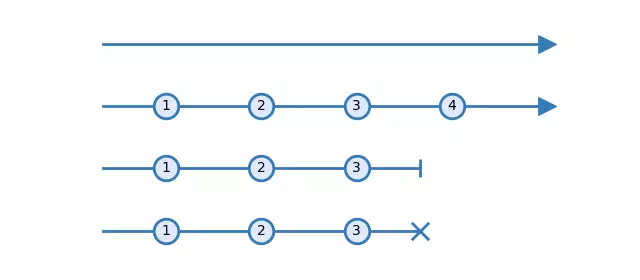

Строка, заканчивающаяся *стрелкой*, означает, что Observable продолжит излучать элементы в будущем. Круг на линии - это положение времени, когда элементы испускаются.

Строка заканчивается трубой *– | –* указывает, что Observable закончился успешно. После этого больше не может быть выпущено никаких элементов.

Строка, заканчивающаяся косой чертой *– X –* указывает, что Observable закончился из-за ошибки. После этого больше не может быть выпущено никаких элементов.



> Диаграмма реактивности



Граф реактивности - это еще одна форма представления. Они используются для описания поведения приложения или компонента. Они похожи на диаграммы активности UML, но описывают поток данных, а не поток управления. Рассмотрим приложение, которое просто принимает наблюдаемый источник в качестве входных данных, уменьшает значение и сохраняет только четные значения. Вот диаграмма реактивности этого приложения:

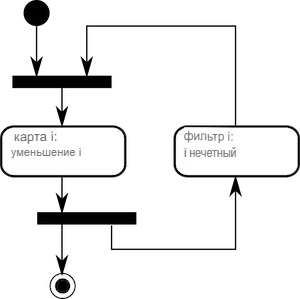

Черный круг указывает на наблюдаемый источник. Закругленные прямоугольники являются операторами. Здесь мы нанизываем два оператора:* map* и *filter*. Окружающий черный круг - это тонущая часть потока данных. Более сложные графики могут быть описаны аналогичным образом. 

Диаграммы реактивности - хороший способ работать над архитектурой перед кодированием. Смотрите здесь еще один простой пример с циклическим графиком:

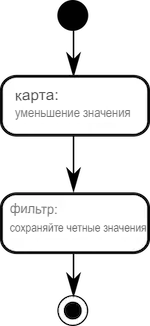



> Пример кода

Реализуем код, соответствующий первой диаграмме реакций из предыдущего раздела. Нам понадобится:



Первый шаг - создать наблюдаемый источник. Здесь мы не используем реальные данные, а создаем наблюдаемое из списка.

In [ ]:
import rx
import rx.operators as ops

source = rx.from_iterable([1, 2, 3, 4])

Затем мы строим вычислительные функции. Это включает в себя два оператора: *map* и *filter* .

In [ ]:
import rx
import rx.operators as ops

source = rx.from_iterable([1, 2, 3, 4])

source.pipe(
    ops.map(lambda i: i - 1),
    ops.filter(lambda i: i % 2 == 0),
)

*Pipe Operator* позволяет создавать цепные операторы. Вот простой способ создания графиков. В *map* и *filter* операторы принимают функции в качестве параметров. Мы используем **lambdas** здесь для этих простых вычислений. Вы уже можете выполнить этот код. Однако имейте в виду, что ничего не произойдет: график генерируется, но никто его не зарегистрировал, поэтому потока данных еще нет.

In [ ]:
import rx
import rx.operators as ops

source = rx.from_iterable([1, 2, 3, 4])

source.pipe(
    ops.map(lambda i: i - 1),
    ops.filter(lambda i: i % 2 == 0),
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e: print("on_error: {}".format(e))
)

Способ регистрации регистрирует наблюдаемое. Он имеет три команды обратного вызова. Эти обратные вызовы будут вызываться в разное время:


*   *on_next* вызывается каждый раз при получении элемента.
*   *on_completed* вызывается при успешном завершении Observable.
*   *on_error* вызывается, когда Observable завершается из-за ошибки. 
*   Новый пункт





Существует последний шаг, необходимый для очистки ресурса, когда он будет завершен. Для этого метод **register** возвращает одноразовый объект. Обработчик этого одноразового объекта можно вызвать для очистки ресурсов: 

In [ ]:
import rx
import rx.operators as ops
 
source = rx.from_iterable([1, 2, 3, 4])
 
disposable = source.pipe(
    ops.map(lambda i: i - 1),
    ops.filter(lambda i: i % 2 == 0),
).subscribe(
    on_next=lambda i: print("on_next: {}".format(i)),
    on_completed=lambda: print("on_completed"),
    on_error=lambda e: print("on_error: {}".format(e)),
)
 
disposable.dispose()
print

Вывод программы:

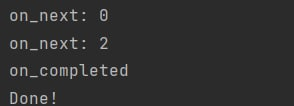

Работу кода можно проверить в файле "charts.py".



> Что такое акторы?



**Акторы** — это те же объекты, но:


*   В отличие от обычных объектов, акторы не могут вызывать методы друг друга.
*   Акторы могут передавать информацию **только через неизменяемые сообщения**.

При получении сообщения актор может:

*   Создать новые акторы (они будут ниже в иерархии),
*   Отослать сообщения другим акторам,
*   Остановить акторы ниже в иерархии и себя.



Рассмотрим на примере:

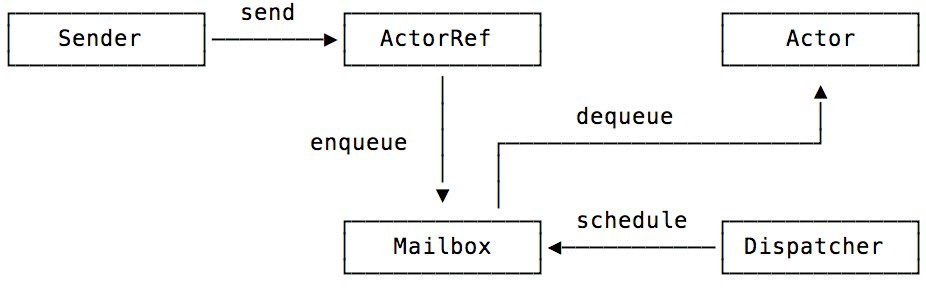

Актор А хочет отправить сообщение актору Б. Всё, что у него есть — ActorRef (некий адрес). Актор Б может находиться где угодно.
Актор А отправляет письмо Б через систему (ActorSystem). Система кладёт письмо в почтовый ящик актора Б и «будит» актор Б. Актор Б берёт письмо из ящика и что-то делает.

По сравнению с вызовом методов у другого объекта, выглядит излишне сложно, но модель акторов прекрасно ложится на реальный мир, если представить, что акторы — это люди, которые обучены что-то делать в ответ на определённые раздражители.

Представим себе отца и сына:

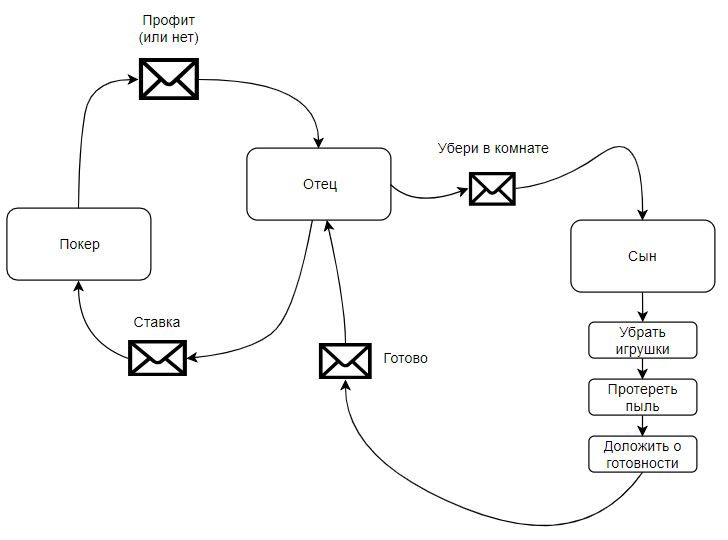

Отец шлёт сыну СМСку «Убери в комнате» и продолжает заниматься своими делами. Сын читает СМСку и начинает уборку. Отец тем временем играет в покер. Сын заканчивает уборку и шлёт СМС «Готово». Выглядит просто.

Теперь представим, что отец и сын не акторы, а обычные объекты, которые могут дёргать методы друг у друга. Отец дёргает сына за метод «убери в комнате» и следует за ним по пятам, ожидая, пока сын не закончит уборку и не передаст управление обратно отцу. Играть в покер в это время отец не может. В этом контексте модель акторов становится более привлекательной.

# Преимущества реактивного программирования.

С помощью реактивного программирования мы можем повысить уровень абстракции нашего кода, чтобы сосредоточиться на взаимозависимости событий, определяющих бизнес-логику, вместо того, чтобы постоянно возиться с большим количеством деталей реализации. С помощью функционального программирования код также будет более кратким.

Реактивное программирование наиболее удобно там,где поток данных не регулярен и есть наибольшее количество слушателей на эти события.

Мы можем использовать Реактивное программирование для обработки асинхронных входящих данных — возможно, задач с большим количеством взаимодействия с пользователем (щелчки, жесты и т.д.) — или обработки системных событий (датчики, гироскоп и т.д.). То есть мы можем использовать со всеми видами взаимодействий, где события изображаются как объект государства. Такой подход позволяет лучше описывать динамические процессы, а также упрощает асинхронное написание кода. Наконец, мы получили лучшую производительность в асинхронном контексте и параллельную обработку потоков данных.